In [1]:
"""
Step 1: Big Picture and Set Up
"""
import sklearn     #importing relevant packages
import numpy as np 
import os

np.random.seed(56)

#plotting figures settings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#saving the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension,dpi=resolution)

"""Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """
    
   


'Save the selected figure into disc under an image extention and resolution\n\n  Parameters\n  ----------\n  fig_id : figure handle\n    The id number of the figure\n  tight_layout : boolean (True or False)\n    Specifies whenther the layout should be tight or not\n  fig_extension: string\n    Under what extension should the file be saved ("png" or "jpg")\n  resolution: int\n    the quality of the figure (ie. 100,200,300)\n\n  Returns\n  -------\n  void\n    Does not return any value\n  '

In [2]:
"""
Step 2: Get the Data

spent some time cleaning it up, added labels, delimited into actual columns so it is more usable
went from rows of space separated values to a data frame with 14 columns
"""

import tarfile #supports compressed files
from six.moves import urllib #support URL downloads
import pandas as pd #running locally first, will add more stuff when i move on to colab to test

HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch housing data from a remote URL to Colab file system"""
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

#housing = load_housing_data()
# Done when testing locally
# HOUSING_PATH = "C://Users//avons//Downloads//housing.csv"
# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = housing_path
#     return pd.read_csv(csv_path, delim_whitespace=True,header=None) #sep="  ",

housing = load_housing_data()
housing.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
housing.head(10)
# row = next(housing.iterrows())[1]
# cleaned_up_row = row.str.split(" ")
# print(cleaned_up_row)
# housing_cleaned= pd.DataFrame(columns = ["attr 1","attr 2","attr 3","attr 4","attr 5","attr 6","attr 7","attr 8","attr 9","attr 10","attr 11","attr 12","attr 13","attr 14"])
# housing_cleaned.append(cleaned_up_row)
# print(housing_cleaned)
#this is a first look at the data, it has no labels and no scaling factors which explain how big the numbers are    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


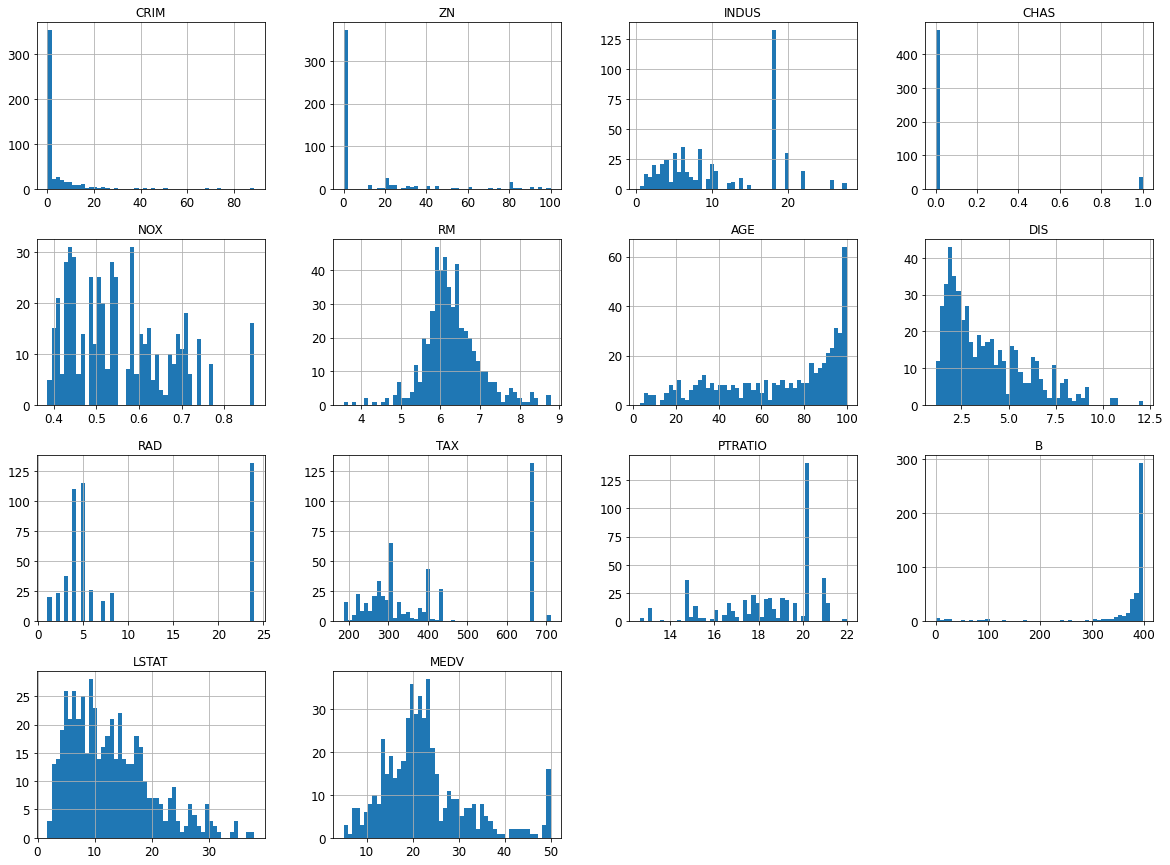

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

(404, 14)


<AxesSubplot:>

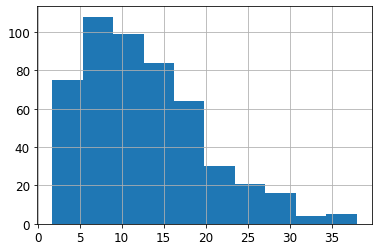

In [6]:
from sklearn.model_selection import train_test_split
#splitting the data into train and test based on the 80-20 rule
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=56)
print(train_set.shape)
#print(test_set.shape) #commented out while programming to avoid datd snooping bias
housing["LSTAT"].hist()

In [7]:
#this looks pretty okay but is still tail heavy, so i'm going to try to transform it to achieve a more ideal bell shaped distribution
housing["LSTAT"] = pd.cut(housing["LSTAT"],bins=[0, 4.5, 9., 13.5, 18., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["LSTAT"].value_counts()

2    140
3    126
5    105
4     92
1     43
Name: LSTAT, dtype: int64

<AxesSubplot:>

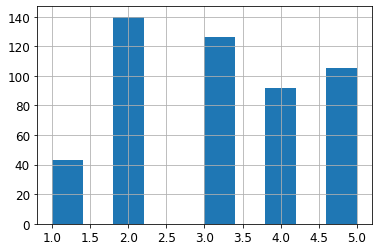

In [8]:
housing["LSTAT"].hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=56) #we are choosing an appropriate sample to conduct learning
for train_index, test_index in split.split(housing, housing["LSTAT"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["LSTAT"].value_counts()/len(strat_test_set)
housing["LSTAT"].value_counts()/len(housing)


2    0.276680
3    0.249012
5    0.207510
4    0.181818
1    0.084980
Name: LSTAT, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='TAX'>

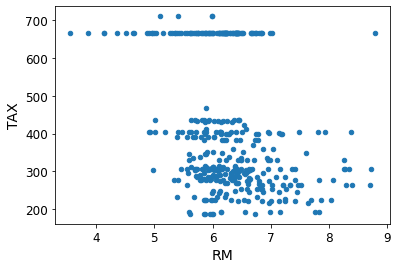

In [10]:
"""Step 3: Visualization and gaining insights
Time to make nice graphs
"""
for set_ in (strat_train_set,strat_test_set):
    set_.drop("LSTAT", axis = 1, inplace = True)
housing = strat_train_set.copy()
housing.plot(kind="scatter",x="RM",y="TAX")

<AxesSubplot:xlabel='RM', ylabel='TAX'>

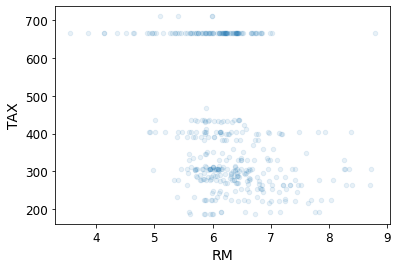

In [11]:
#a nicer plot
housing.plot(kind="scatter",x="RM",y="TAX",alpha=0.1)

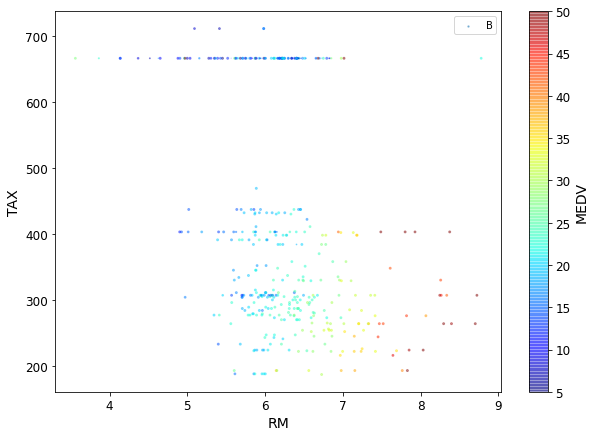

In [12]:
housing.plot(kind="scatter", x="RM", y="TAX", alpha=0.4,
    s=housing["B"]/100, label="B", figsize=(10,7),
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [13]:
#not adding fancier features rn, moving onto correlation coefficients
corr_matrix = housing.corr()
corr_matrix.shape

(13, 13)

In [14]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.701263
ZN         0.325489
B          0.322895
DIS        0.200117
CHAS       0.179527
AGE       -0.327759
RAD       -0.362894
NOX       -0.387985
CRIM      -0.403387
TAX       -0.452361
INDUS     -0.457187
PTRATIO   -0.472236
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='B', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='AGE', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='RM', ylabel='B'>,
        <AxesSubplot:xlabel='AGE', ylabel='B'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='B', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='AGE', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='AGE'>,
        <AxesSubplot:xlabel='B', ylabel='AGE'>,
        <AxesSubplot:xlabel='RM', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>]], dtype=object)

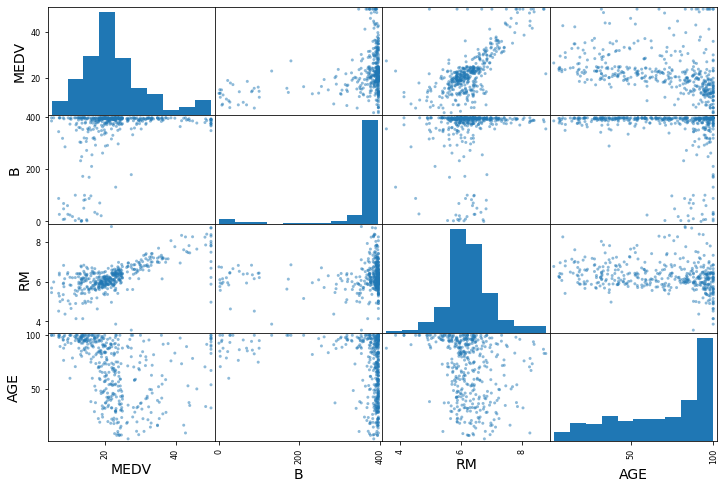

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "B", "RM",
              "AGE"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 10.0, 0.0, 70.0)

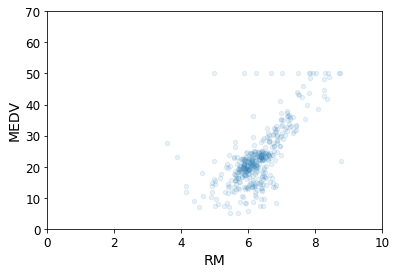

In [16]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.1)
plt.axis([0,10,0,70])

In [17]:
#pick up with feature engineering tomorrow
#Lets see if we can create some better features of the model
housing["DIS_TO_RAD"] = housing["DIS"]/housing["RAD"]
housing["CRIM_TO_B"] = housing["CRIM"]/housing["B"]
housing["TAX_TO_PTRATIO"] = housing["TAX"]/housing["PTRATIO"]
housing.shape

(404, 16)

In [18]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV              1.000000
RM                0.701263
ZN                0.325489
B                 0.322895
DIS               0.200117
CHAS              0.179527
DIS_TO_RAD        0.146584
CRIM_TO_B        -0.105701
AGE              -0.327759
TAX_TO_PTRATIO   -0.361180
RAD              -0.362894
NOX              -0.387985
CRIM             -0.403387
TAX              -0.452361
INDUS            -0.457187
PTRATIO          -0.472236
Name: MEDV, dtype: float64

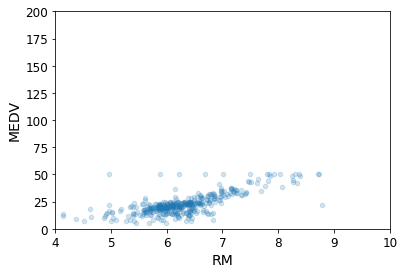

In [19]:
housing.plot(kind="scatter", x="RM", y="MEDV",alpha=0.2)
plt.axis([4,10,0,200])
plt.show()

In [20]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV,DIS_TO_RAD,CRIM_TO_B,TAX_TO_PTRATIO
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.410805,12.070545,11.070965,0.061881,0.555579,6.269035,68.609406,3.800804,9.571782,409.391089,18.448020,355.828515,22.669307,1.007629,0.156652,22.024607
std,7.288503,24.043010,6.887149,0.241238,0.117420,0.728153,28.419739,2.146399,8.726179,168.438473,2.172549,92.764624,9.371622,1.406862,1.454051,7.855746
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000,0.047067,0.000016,9.842932
25%,0.080050,0.000000,5.130000,0.000000,0.449000,5.875000,43.625000,2.077100,4.000000,280.750000,17.000000,374.237500,16.950000,0.128796,0.000205,14.892473
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.198500,77.100000,3.095750,5.000000,334.500000,19.100000,391.180000,21.200000,0.668080,0.000667,20.307692
75%,3.716458,18.500000,18.100000,0.000000,0.624000,6.604500,94.625000,5.218725,24.000000,666.000000,20.200000,396.242500,25.000000,1.180181,0.010946,32.970297
max,67.920800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000,9.220300,20.992875,35.373134


In [21]:
#Step 4: Preparing Data for Machine Learning
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [22]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B


In [23]:
sample_incomplete_rows.dropna(subset=["RM"])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [25]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.19850e+00, 7.71000e+01, 3.09575e+00, 5.00000e+00, 3.34500e+02,
       1.91000e+01, 3.91180e+02])

In [27]:
housing.median().values

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.19850e+00, 7.71000e+01, 3.09575e+00, 5.00000e+00, 3.34500e+02,
       1.91000e+01, 3.91180e+02])

In [28]:
X = imputer.transform(housing)
print(X)

[[5.60200e-02 0.00000e+00 2.46000e+00 ... 1.93000e+02 1.78000e+01
  3.92630e+02]
 [1.43337e+01 0.00000e+00 1.81000e+01 ... 6.66000e+02 2.02000e+01
  3.72920e+02]
 [1.83377e+00 0.00000e+00 1.95800e+01 ... 4.03000e+02 1.47000e+01
  3.89610e+02]
 ...
 [1.05740e-01 0.00000e+00 2.77400e+01 ... 7.11000e+02 2.01000e+01
  3.90110e+02]
 [6.64200e-02 0.00000e+00 4.05000e+00 ... 2.96000e+02 1.66000e+01
  3.91270e+02]
 [6.15100e-02 0.00000e+00 5.19000e+00 ... 2.24000e+02 2.02000e+01
  3.96900e+02]]


In [29]:
housing_tr = pd.DataFrame(X, columns=housing.columns, index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B


In [30]:
imputer.strategy

'median'

In [31]:
housing_tr = pd.DataFrame(X,columns=housing.columns, index=housing.index)

In [32]:
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63
388,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61
408,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21


In [33]:
#skipping the cell under "Writing custom transformers"


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.46085521, -0.50266214, -1.25184496, ..., -1.28628213,
        -0.29864604,  0.39721086],
       [ 1.50050558, -0.50266214,  1.02186703, ...,  1.52534681,
         0.8074166 ,  0.18447417],
       [-0.21664122, -0.50266214,  1.23702647, ..., -0.03799021,
        -1.72731029,  0.36461498],
       ...,
       [-0.45402505, -0.50266214,  2.42331099, ...,  1.79283793,
         0.76133066,  0.37001165],
       [-0.45942654, -0.50266214, -1.02069393, ..., -0.67402467,
        -0.85167736,  0.38253192],
       [-0.46010103, -0.50266214, -0.854963  , ..., -1.10201047,
         0.8074166 ,  0.44329841]])

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [36]:
print(housing.shape)
print(housing_prepared.shape)

(404, 12)
(404, 12)


In [37]:
#pick up from step 5 tomorrow
#Select and Train Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [38]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [39]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [37.37583525 10.61419023 38.84272046 18.14257992 17.20653282]


In [40]:
print("Labels: ",list(some_labels) )

Labels:  [50.0, 10.2, 50.0, 17.2, 14.9]


In [41]:
some_data_prepared

array([[-0.46085521, -0.50266214, -1.25184496, -0.25683275, -0.57624397,
         2.14776468, -0.52878799, -0.28063272, -0.7540449 , -1.28628213,
        -0.29864604,  0.39721086],
       [ 1.50050558, -0.50266214,  1.02186703, -0.25683275,  1.23148093,
        -1.90997808,  1.10590447, -1.03151623,  1.65549066,  1.52534681,
         0.8074166 ,  0.18447417],
       [-0.21664122, -0.50266214,  1.23702647,  3.89358447,  0.42141553,
         2.10788853,  1.04248968, -0.82104307, -0.52456532, -0.03799021,
        -1.72731029,  0.36461498],
       [ 0.54854016, -0.50266214,  1.02186703, -0.25683275,  0.35319949,
        -0.89657367,  1.03192054, -1.09439695,  1.65549066,  1.52534681,
         0.8074166 , -0.44456156],
       [ 0.5963925 , -0.50266214,  1.02186703, -0.25683275,  1.34233199,
         0.04395363,  0.53164828, -0.47473263,  1.65549066,  1.52534681,
         0.8074166 , -0.90252288]])

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.363448642944464

In [43]:
# from sklearn.metrics import mean_absolute_error

# lin_mae = mean_absolute_error(housing_labels,housing_predictions)
# lin_mae

In [44]:
# from sklearn.tree import DecisionTreeRegressor
# tree_reg = DecisionTreeRegressor(random_state=56)
# tree_reg.fit(housing_prepared,housing_labels)

In [45]:
# housing_predictions = tree_reg.predict(housing_prepared)
# tree_mse = mean_squared_error(housing_labels,housing_predictions)
# tree_rmse = np.sqrt(tree_mse)
# tree_rmse
# #overfitted

In [46]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=5)
# tree_rmse_scores = np.sqrt(-scores)

In [47]:
# def display_scores(scores):
#     print("Scores: ",scores)
#     print("Mean: ",scores.mean())
#     print("Standard Deviation: ", scores.std())
# display_scores(tree_rmse_scores)

In [48]:
# lin_scores = cross_val_score(lin_reg,housing_prepared, scoring="neg_mean_squared_error",cv=5)
# lin_rmse_scores = np.sqrt(-lin_scores)
# display_scores(lin_rmse_scores)

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=56)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=56)

In [52]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.6486396732692155

In [ ]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring = "neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=5)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]
forest_reg = RandomForestRegressor(random_state=56)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = { 'n_estimators': randint(low=1,high=200),
                  'max_features': randint(low=1,high=8),
                 }
forest_reg = RandomForestRegressor(random_state=56)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=56)
rnd_search.fit(housing_prepared,housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# extra_attribs = ["DIS_TO_RAD","CRIM_TO_B","TAX_TO_PTRATIO"]
# cat_encoder = full_pipeline.named_transformers_["num"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes),reverse=True)
#cat keyerror

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

In [ ]:
from scipy import stats
#confidence interval
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

Step 7: Reporting
For this codeathon which asked us to build a predictive system that reports the price of a house in Boston, what I did was follow the idea that we were presented with for the California example in class. When we got the data set, the first thing I did was take a look at the actual CSV file and found it wasn't formatted or labelled in an appropriate manner for our purposes. I spent a lot of time in Step 1 actually cleaning up the data and making it readable. I then started the rest of the 8 steps described in the end to end project and found it quite interesting as I stepped through each line of code. Then came the part about creating custom features and I thought about things which I was interested in if I were to buy a house such as teachers to student ratios for the amount of tax paid. Therefore I decided to create and incorporate those into model.
I began by writing the file locally and later adapted it to run on colab. While testing, I found that the best model for this assignment was the Random Forest Regressor as it has the lowest RMSE value which is not 0. Therefore I chose to stick with that model for the project. 
Finally, I tested it using my test data set and found the RMSE to be an acceptable value and therefore thought this project complete.